# Welcome to SImulation of SEctoral Pathways with Uncertainty Exploration for DEcarbonization (SISEPUEDE)

SISEPUEDE is yada yada...


In [1]:
## load packages
import logging
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import temp as tmp
import sisepuede as ssp
from typing import *
import warnings
warnings.filterwarnings("ignore")


/Users/jsyme/anaconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##  Initialize the SISEPUEDE class to get started running some models
- see ``?SISEPUEDE`` for more information on initialization arguments

In [2]:

sisepuede = ssp.SISEPUEDE(
    "calibrated",
    regions = ["brazil"],
    try_exogenous_xl_types_in_variable_specification = True,
)

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-01-18 10:42:25,415 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-01-18 10:42:25,420 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-01-18 10:42:25,421 - INFO - 	Setting export engine to 'sqlite'.
2024-01-18 10:42:25,461 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-01-18 10:42:25,462 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-01-18 10:42:25,467 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-01-18 10:42:25,468 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-01-18 10:42:25,471 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-01-18 10:42:25,473 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-01-18 10:42:25,477 - WARNING - No index

In [4]:
?ssp.SISEPUEDE

Init signature:
ssp.SISEPUEDE(
    data_mode: str,
    attribute_design: Optional[attribute_table.AttributeTable] = None,
    db_type: Optional[str] = None,
    dir_ingestion: Optional[str] = None,
    id_str: Optional[str] = None,
    initialize_as_dummy: bool = False,
    logger: Optional[logging.Logger] = None,
    n_trials: Optional[int] = None,
    random_seed: Optional[int] = None,
    regions: Optional[List[str]] = None,
    regex_template_prepend: str = 'sisepuede_run',
    replace_output_dbs_on_init: bool = False,
    try_exogenous_xl_types_in_variable_specification: bool = False,
)
Docstring:     
    SISEPUEDE (SImulation of SEctoral Pathways and Uncertainty Exploration for
            DEcarbonization) is an integrated modeling framework (IMF) used to
            assess decarbonization pathways under deep uncertainty. SISEPUEDE
            estimates GHG emissions primarily using the IPCC Guidelines for
            Greenhouse Gas Inventories (2006 and 2019R) and further inclu

###  Call the .project_scenarios() method (or simply call the SISEPUEDE object) to write outputs directly to a database (prevents significant memory usage)
- This method returns a list of primary keys that were successfully run
- The first positional argument, ``primary_keys``, can be a list of primary keys *or* a dictionary of scenario dimensions
    - e.g., ``sisepuede.project_scenarios([0, 5, 1989])`` uses 3 primary keys
    - ``sisepuede.project_scenarios({"strategy_id": [0], "future_id": [0, 9, 903]})`` specifies a scenario dimensional subset of primary keys
- see ``?sisepuede.project_scenarios`` for more information on inputs



In [8]:
# how do i run?
# if i'm given a new country, how do i put this together?


df_fake_data = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref/fake_data/fake_data_complete.csv")



In [6]:
?sisepuede.models.project

Signature:
sisepuede.models.project(
    df_input_data: pandas.core.frame.DataFrame,
    check_results: bool = True,
    fields_check: Union[List[str], str, NoneType] = 'emissions_output_subsector_aggregate',
    include_electricity_in_energy: bool = True,
    models_run: Optional[List[str]] = None,
    regions: Union[List[str], str, NoneType] = None,
    run_integrated: bool = True,
    time_periods_run: Optional[List[int]] = None,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Execute the SISEPUEDE DAG.

Function Arguments
------------------
df_input_data: DataFrame containing SISEPUEDE inputs

Optional Arguments
------------------
- models_run: list of sector models to run as defined in
        SISEPUEDEModels.model_attributes. Can include the following values:

        * AFOLU (or af)
        * Circular Economy (or ce)
        * IPPU (or ip)
        * Energy (or en)
                * Note: set include_electricity_in_energy = False to avoid
                        running

In [3]:
# project across 2 futures for 1 design and, notably, *all* strategies (no filtering)
dict_filt = {
    "future_id": [0],
    "design_id": [0],
    "strategy_id": [1014, 5009]
}


primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2 # how often do we write to the output database
)

2024-01-18 10:57:43,975 - INFO - 
***	STARTING REGION brazil	***

2024-01-18 10:58:00,587 - INFO - Trying run primary_id = 14014 in region brazil
2024-01-18 10:58:00,593 - INFO - Running AFOLU model
2024-01-18 10:58:01,325 - INFO - AFOLU model run successfully completed
2024-01-18 10:58:01,327 - INFO - Running CircularEconomy model
2024-01-18 10:58:01,503 - INFO - CircularEconomy model run successfully completed
2024-01-18 10:58:01,505 - INFO - Running IPPU model
2024-01-18 10:58:01,769 - INFO - IPPU model run successfully completed
2024-01-18 10:58:01,770 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-01-18 10:58:01,844 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-01-18 10:58:02,246 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-01-18 10:58:02,247 - INFO - Running Energy model (Electricity and Fuel Production: tryi

2024-18-Jan 10:58:05.253 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-18-Jan 10:58:06.220 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


2024-18-Jan 10:58:55.879 Started modeling scenario.
2024-18-Jan 11:02:59.419 Finished modeling scenario.


2024-01-18 11:03:00,374 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-01-18 11:03:00,546 - INFO - EnergyProduction model run successfully completed
2024-01-18 11:03:00,548 - INFO - Running Energy (Fugitive Emissions)
2024-01-18 11:03:00,739 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-01-18 11:03:00,740 - INFO - Appending Socioeconomic outputs
2024-01-18 11:03:00,775 - INFO - Socioeconomic outputs successfully appended.
2024-01-18 11:03:00,811 - INFO - Model run for primary_id = 14014 successfully completed in 300.22 seconds (n_tries = 1).
2024-01-18 11:03:00,981 - INFO - Trying run primary_id = 127127 in region brazil
2024-01-18 11:03:00,982 - INFO - Running AFOLU model
2024-01-18 11:03:01,531 - INFO - AFOLU model run successfully completed
2024-01-18 11:03:01,532 - INFO - Running CircularEconomy model
2024-01-18 11:03:01,683 - INFO - CircularEconomy model run successfully completed
2024-01-18 11:03:01,684 - 

2024-18-Jan 11:03:06.270 Started modeling scenario.
2024-18-Jan 11:07:57.999 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2024-01-18 11:07:59,171 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-01-18 11:07:59,301 - INFO - EnergyProduction model run successfully completed
2024-01-18 11:07:59,302 - INFO - Running Energy (Fugitive Emissions)
2024-01-18 11:07:59,539 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-01-18 11:07:59,542 - INFO - Appending Socioeconomic outputs
2024-01-18 11:07:59,630 - INFO - Socioeconomic outputs successfully appended.
2024-01-18 11:07:59,661 - INFO - Model run for primary_id = 127127 successfully completed in 298.68 seconds (n_tries = 1).
2024-01-18 11:08:03,298 - INFO - Table MODEL_OUTPUT successfully written to database.
2024-01-18 11:08:03,314 - INFO - 
***	 REGION brazil COMPLETE	***

2024-01-18 11:08:03,34

In [29]:
sisepuede.odpt_primary.get_key_value(
    **{
        "design_id": 0,
        "future_id": 0,
        "strategy_id": 1014
    }
)

14014

In [34]:
df_in = sisepuede.generate_scenario_database_from_primary_key(127127);
df_in = df_in.get("brazil")

In [35]:
df_out = sisepuede.models.model_afolu.project(df_in);
#df_out[[x for x in df_out.columns if x.startswith("emission_co2e") & ("lsmm" in x)]].tail()

fields_total = [x for x in df_out.columns if x.startswith("emission_co2e_subsector_total")]

df_out[fields_total].sum(axis = 1)


0      406.628562
1      438.291469
2      472.017805
3      497.912648
4      530.162563
5      560.788569
6      590.152864
7      620.805276
8      651.106730
9      680.954721
10     670.795092
11     559.873269
12     395.666680
13     198.334541
14      53.907061
15     -38.673668
16     -70.625113
17    -108.396439
18    -151.666211
19    -199.939931
20    -251.020848
21    -305.784176
22    -363.473285
23    -423.660017
24    -485.807915
25    -549.410044
26    -614.249433
27    -679.805444
28    -745.639249
29    -811.348965
30    -876.327387
31    -940.133831
32   -1002.279039
33   -1062.517613
34   -1120.694025
35   -1177.069842
dtype: float64

In [37]:
df_in2 = df_in.copy()
df_in2["pop_lvst_initial_chickens"] = np.array(df_in2["pop_lvst_initial_chickens"])*1000

df_out2 = sisepuede.models.model_afolu.project(df_in2);
fields_total = [x for x in df_out2.columns if x.startswith("emission_co2e_subsector_total")]

df_out2[fields_total].sum(axis = 1)

0      412.631463
1      444.300589
2      478.033403
3      503.934754
4      536.191658
5      566.824605
6      596.235490
7      626.948232
8      657.310129
9      687.218682
10     677.120004
11     566.157313
12     401.896411
13     204.497332
14      59.989286
15     -32.685251
16     -64.747290
17    -102.638580
18    -146.036109
19    -194.443720
20    -245.663053
21    -300.568687
22    -358.402133
23    -418.734273
24    -481.027959
25    -544.775806
26    -609.762277
27    -675.465001
28    -741.445084
29    -807.300620
30    -872.424394
31    -936.377995
32    -998.669802
33   -1059.054267
34   -1117.375698
35   -1173.894826
dtype: float64

In [40]:
1-1173.89/1177.07


0.002701623522815

In [42]:
?ssp.SISEPUEDE

Init signature:
ssp.SISEPUEDE(
    data_mode: str,
    attribute_design: Optional[attribute_table.AttributeTable] = None,
    db_type: Optional[str] = None,
    dir_ingestion: Optional[str] = None,
    id_str: Optional[str] = None,
    initialize_as_dummy: bool = False,
    logger: Optional[logging.Logger] = None,
    n_trials: Optional[int] = None,
    random_seed: Optional[int] = None,
    regions: Optional[List[str]] = None,
    regex_template_prepend: str = 'sisepuede_run',
    replace_output_dbs_on_init: bool = False,
    try_exogenous_xl_types_in_variable_specification: bool = False,
)
Docstring:     
    SISEPUEDE (SImulation of SEctoral Pathways and Uncertainty Exploration for
            DEcarbonization) is an integrated modeling framework (IMF) used to
            assess decarbonization pathways under deep uncertainty. SISEPUEDE
            estimates GHG emissions primarily using the IPCC Guidelines for
            Greenhouse Gas Inventories (2006 and 2019R) and further inclu

####  Print successfully completed primary keys

In [14]:
for k, v in primary_keys_out.items():
    print(v)

[263263, 266266, 268268, 269269, 271271, 144615, 158629, 263734, 266737, 268739, 269740, 271742]
[144144, 158158, 263263, 266266, 268268, 269269, 271271, 144615, 158629, 263734, 266737, 268739, 269740, 271742]


###  Retrieve outputs using SISEPUEDE.read_output()

In [17]:
df_out = sisepuede.read_output(None)
df_out

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,144144,brazil,0,2.974197e+06,2.044387e+07,1.113471e+06,2.659536e+06,212055.577843,799994.326474,3.503781e+07,...,5.219421e+07,196851.192912,2.171329e+06,5.782080e+07,1.730770e+06,3.259899e+06,1.319115e+07,8.045758e+08,3.115091e+07,1.501269e+07
1,144144,brazil,1,2.984298e+06,2.051330e+07,1.117253e+06,2.668569e+06,212775.774383,802711.317705,3.515681e+07,...,4.923673e+07,193370.623759,1.544224e+06,5.489806e+07,1.814988e+06,4.837170e+06,1.257283e+07,8.179020e+08,3.156543e+07,1.553670e+07
2,144144,brazil,2,2.995074e+06,2.058737e+07,1.121287e+06,2.678205e+06,213544.086448,805609.828081,3.528376e+07,...,5.308235e+07,200368.416314,1.639110e+06,6.013269e+07,2.141837e+06,4.147021e+06,1.434736e+07,8.129893e+08,3.227139e+07,1.586035e+07
3,144144,brazil,3,3.006532e+06,2.066613e+07,1.125576e+06,2.688450e+06,214361.013140,808691.740502,3.541874e+07,...,5.309118e+07,186322.592621,1.825104e+06,6.173698e+07,2.058541e+06,4.905737e+06,1.462084e+07,8.174147e+08,3.236181e+07,1.640887e+07
4,144144,brazil,4,3.018678e+06,2.074962e+07,1.130124e+06,2.699312e+06,215227.040438,811958.888350,3.556183e+07,...,5.312865e+07,188452.796607,1.613541e+06,5.720191e+07,2.189311e+06,5.534068e+06,1.411179e+07,8.216096e+08,3.279915e+07,1.678978e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,271742,mexico,31,1.452639e+06,1.444229e+07,4.210696e+05,2.876530e+06,28347.361542,442925.370625,6.086671e+05,...,5.211073e+07,265084.357547,7.230338e+05,9.679959e+05,1.167477e+06,1.476659e+07,5.758123e+05,1.133713e+08,4.828103e+06,3.353312e+07
2300,271742,mexico,32,1.477139e+06,1.448284e+07,4.297960e+05,2.916873e+06,28718.146760,450376.163379,6.110059e+05,...,5.274033e+07,268037.155139,7.337880e+05,9.698536e+05,1.175373e+06,1.491241e+07,5.825449e+05,1.137937e+08,4.874733e+06,3.387198e+07
2301,271742,mexico,33,1.501489e+06,1.452831e+07,4.380339e+05,2.956163e+06,29080.308122,457643.802170,6.141048e+05,...,5.331992e+07,270753.026810,7.438040e+05,9.723867e+05,1.182178e+06,1.504429e+07,5.888916e+05,1.140920e+08,4.918169e+06,3.418963e+07
2302,271742,mexico,34,1.525703e+06,1.457830e+07,4.458264e+05,2.994445e+06,29434.648123,464740.766558,6.178956e+05,...,5.384983e+07,273237.444981,7.530932e+05,9.754807e+05,1.187930e+06,1.516245e+07,5.948526e+05,1.142749e+08,4.958327e+06,3.448543e+07


####  Note that SISEPUEDE.read_output() can be used to execute additional filtering queries by using dict_subset = {}
- e.g., if we only care about the final time period, we can set
    ``dict_subset = {"time_period": 35}``

In [21]:
sisepuede.read_output(
    None, 
    dict_subset = {
        sisepuede.key_time_period: [35],
        sisepuede.key_region: ["mexico"]
    }
)

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,144144,mexico,35,1.765833e+06,2.434868e+07,360108.536893,3.589831e+06,35794.754574,510812.174944,1.153452e+06,...,9.185368e+07,472775.734564,1.177751e+06,2.590941e+06,2.242803e+06,2.722378e+07,1.064924e+06,2.207031e+08,9.430059e+06,6.516895e+07
1,158158,mexico,35,1.578880e+06,1.466024e+07,464010.744820,2.907142e+06,30217.741009,465901.525619,6.026501e+05,...,5.367223e+07,287977.515008,7.750814e+05,9.767513e+05,1.240461e+06,1.491007e+07,6.135053e+05,1.190699e+08,4.899000e+06,3.436313e+07
2,263263,mexico,35,1.555907e+06,1.462153e+07,455704.480873,2.878915e+06,29866.685730,459719.471792,6.018277e+05,...,5.983299e+07,320414.456682,8.609433e+05,1.098043e+06,1.385219e+06,1.666017e+07,6.830623e+05,1.332540e+08,5.474636e+06,3.837169e+07
3,266266,mexico,35,1.495326e+06,1.385706e+07,439576.817601,3.029434e+06,28601.911486,464898.601501,6.040565e+05,...,5.637986e+07,274770.936257,7.796336e+05,9.869055e+05,1.182789e+06,1.588890e+07,6.088735e+05,1.126052e+08,5.180832e+06,3.589994e+07
4,268268,mexico,35,1.580293e+06,1.467440e+07,464422.592650,2.909848e+06,30245.448642,466324.593369,6.032291e+05,...,5.377176e+07,288507.587598,7.765012e+05,9.785922e+05,1.242774e+06,1.493794e+07,6.146354e+05,1.192939e+08,4.908140e+06,3.442706e+07
5,269269,mexico,35,1.518211e+06,1.425842e+07,444724.123912,3.077996e+06,29138.150825,471559.734509,6.201360e+05,...,6.473672e+07,316342.690715,8.936946e+05,1.144999e+06,1.367345e+06,1.827495e+07,7.001260e+05,1.305810e+08,5.961057e+06,4.129940e+07
6,271271,mexico,35,1.467265e+06,1.374464e+07,430106.611796,2.974308e+06,28142.257269,455822.698265,5.980330e+05,...,6.191739e+07,302411.907393,8.550519e+05,1.092917e+06,1.306108e+06,1.747338e+07,6.694481e+05,1.246599e+08,5.699144e+06,3.948609e+07
7,144615,mexico,35,1.765833e+06,2.434868e+07,360108.536893,3.589831e+06,35794.754574,510812.174944,1.153452e+06,...,7.413006e+07,381551.310514,9.504984e+05,2.091006e+06,1.810043e+06,2.197081e+07,8.594415e+05,1.781173e+08,7.610483e+06,5.259428e+07
8,158629,mexico,35,1.592779e+06,1.495504e+07,466692.167096,2.946361e+06,30569.551585,470601.838569,6.154011e+05,...,5.013714e+07,268519.527256,7.216008e+05,9.193212e+05,1.160603e+06,1.395824e+07,5.723838e+05,1.116325e+08,4.586509e+06,3.214818e+07
9,263734,mexico,35,1.585477e+06,1.498485e+07,463480.883598,2.940103e+06,30474.802986,468696.858596,6.173181e+05,...,5.227521e+07,279696.805400,7.509227e+05,9.635580e+05,1.211217e+06,1.457135e+07,5.964788e+05,1.166236e+08,4.788948e+06,3.355422e+07


###  1. We can examine aggregate emissions across scenarios

In [25]:
# first, pick a region to examine
region = "brazil"

# could query this, but our dataset is small enough to store in memory
df_out_region = (
    df_out[
        df_out[sisepuede.key_region].isin([region])
    ]
    .reset_index(drop = True)
)

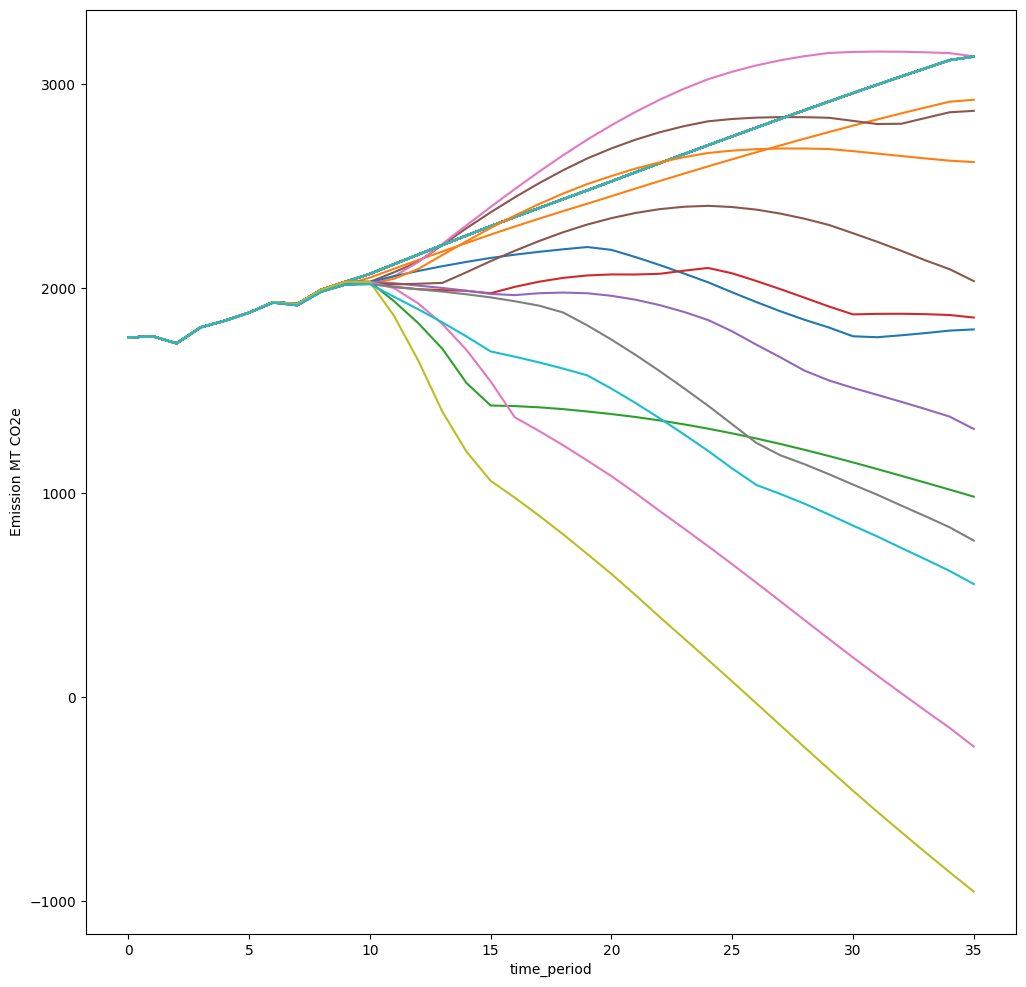

In [26]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")
# 
all_primaries = sorted(list(df_out_region[sisepuede.key_primary].unique()))
dfg = df_out_region.groupby([sisepuede.key_primary])

for i, df_cur in dfg:
  
    
    y = np.array(df_cur[
        [x for x in df_out.columns if x.startswith("emission_co2e_subsector_")]
    ].sum(axis = 1)) 
    x = np.array(df_cur[sisepuede.key_time_period])
    
    ax.plot(x, y)
    
plt.show()


###  2. We can also see CO2e by subsector

###  Look at primary ids

In [33]:
primary_keys = primary_keys_out.get("brazil")
sisepuede.odpt_primary.get_indexing_dataframe_from_primary_key(
    df_out_region[sisepuede.key_primary].unique()
)


,primary_id,design_id,strategy_id,future_id
0,144144,1,0,0
1,145145,1,1001,0
2,146146,1,1002,0
3,147147,1,1003,0
4,148148,1,1004,0
5,149149,1,1005,0
6,150150,1,1006,0
7,151151,1,1007,0
8,152152,1,1008,0
9,153153,1,1009,0


In [40]:
?sisepuede.odpt_primary.get_key_value

Signature: sisepuede.odpt_primary.get_key_value(**kwargs) -> int
Docstring: Get the key value associated with an input set of dimensional values.
File:      ~/Documents/Projects/git_jbus/sisepuede/python/ordered_direct_product_table.py
Type:      method


###  Examine baseline strategy

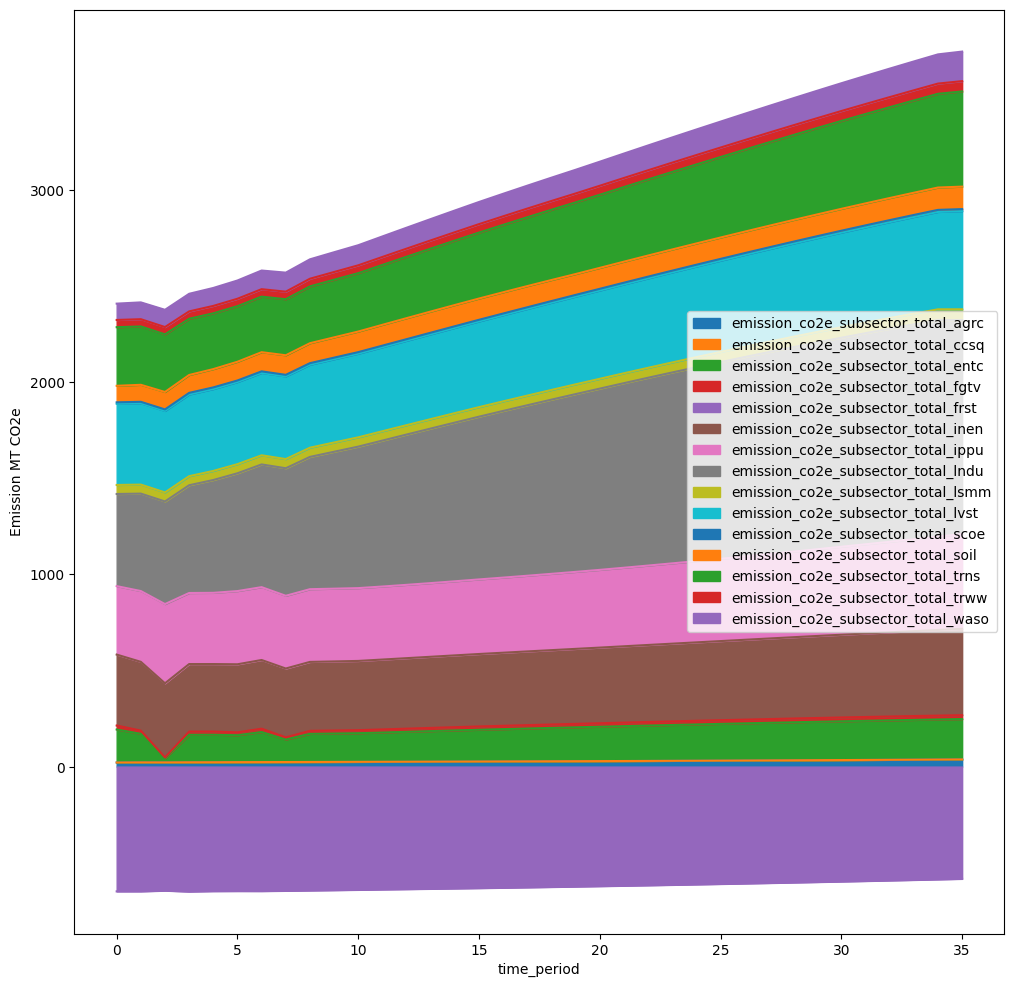

In [48]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 1,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: sisepuede.baseline_strategy,
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]
df_cur[[x for x in df_cur.columns if x.startswith("emission_co2e_subsector_total_")]].plot.area(ax = ax)
plt.show()


In [50]:
?pd.DataFrame.plot.area

Signature: pd.DataFrame.plot.area(self, x=None, y=None, **kwargs) -> 'PlotAccessor'
Docstring:
Draw a stacked area plot.

An area plot displays quantitative data visually.
This function wraps the matplotlib area function.

Parameters
----------
x : label or position, optional
    Coordinates for the X axis. By default uses the index.
y : label or position, optional
    Column to plot. By default uses all columns.
stacked : bool, default True
    Area plots are stacked by default. Set to False to create a
    unstacked plot.
**kwargs
    Additional keyword arguments are documented in
    :meth:`DataFrame.plot`.

Returns
-------
matplotlib.axes.Axes or numpy.ndarray
    Area plot, or array of area plots if subplots is True.

See Also
--------
DataFrame.plot : Make plots of DataFrame using matplotlib / pylab.

Examples
--------
Draw an area plot based on basic business metrics:

.. plot::
    :context: close-figs

    >>> df = pd.DataFrame({
    ...     'sales': [3, 2, 3, 9, 10, 6],
    .

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'emission_co2e_subsector_total_soil' contains both positive and negative values

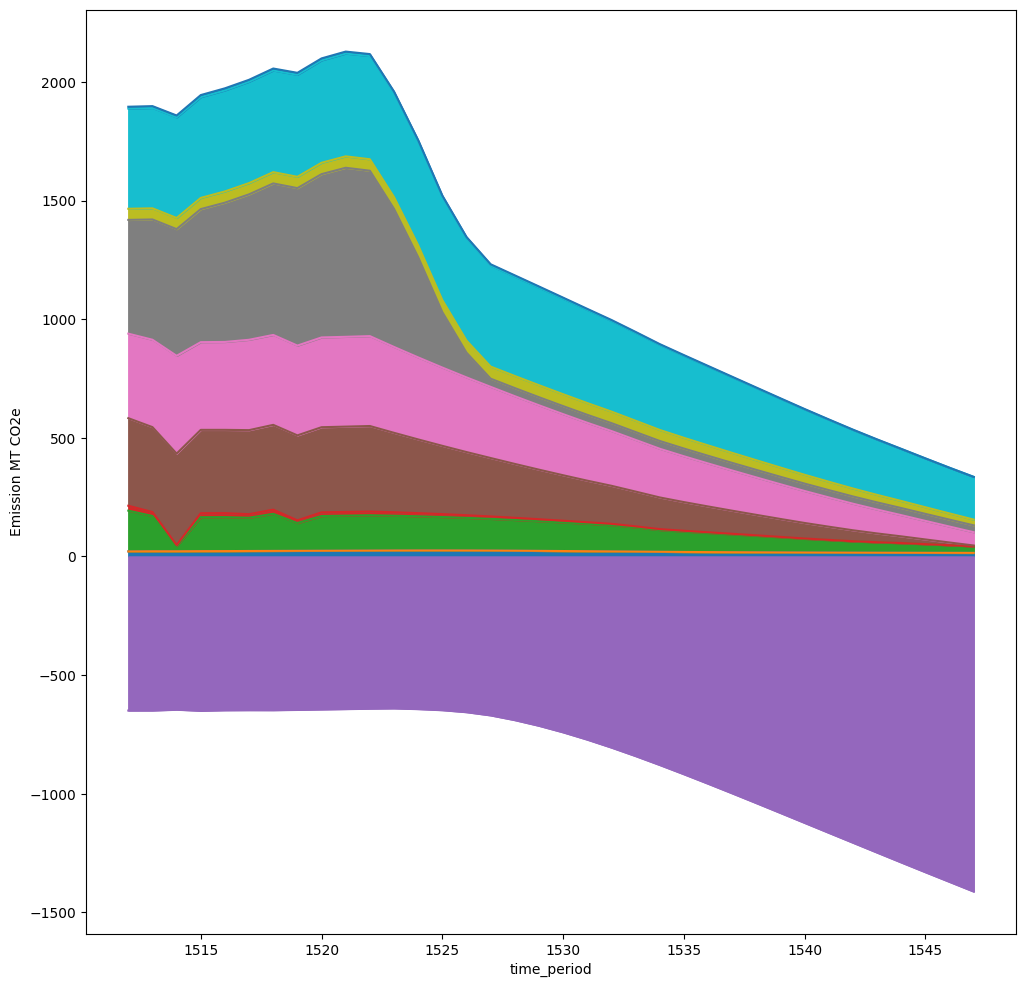

In [49]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

# get scenario key from dictionary
primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 1,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 5009
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]
df_cur[[x for x in df_cur.columns if x.startswith("emission_co2e_subsector_total_")]].plot.area(ax = ax)
plt.show()


###  3a. We can go further down and look at gas within subsector - CH4 emisions from Livestock

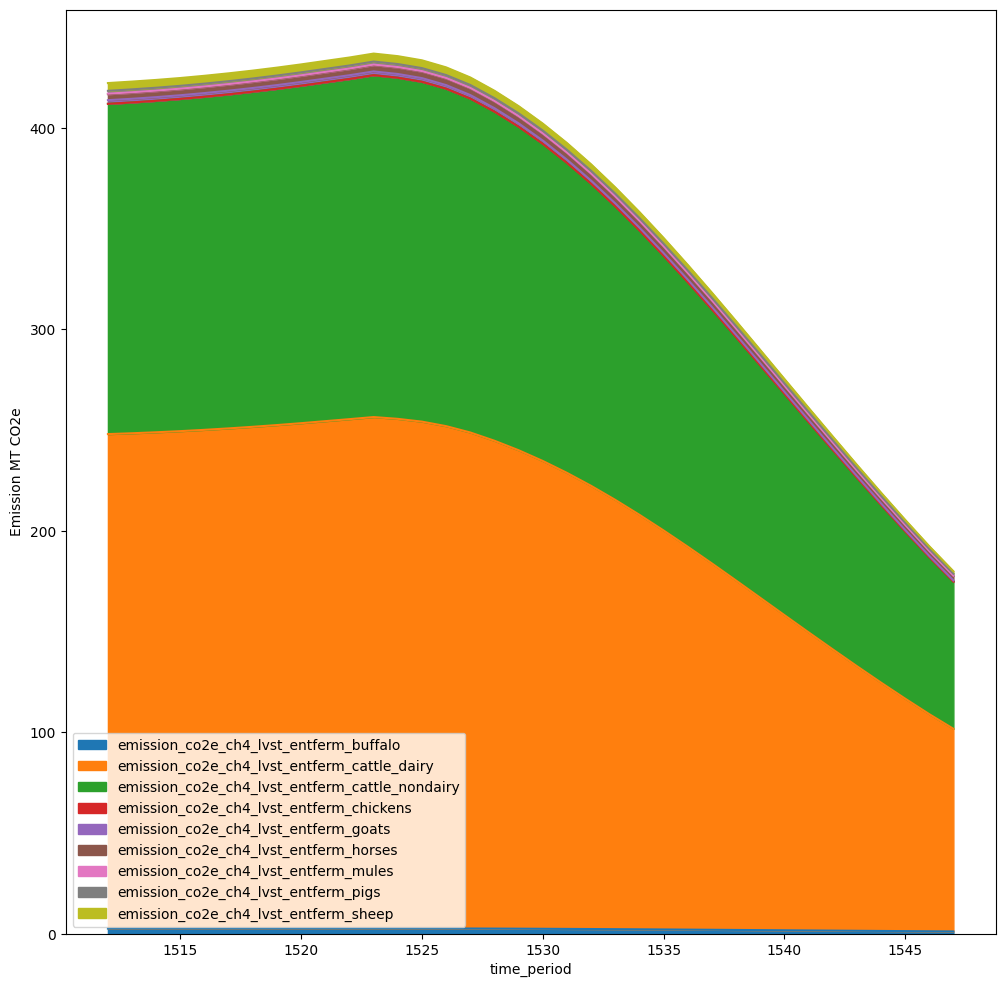

In [54]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

primary_id = sisepuede.odpt_primary.get_key_value(
    **{
        sisepuede.key_design: 1,
        sisepuede.key_future: 0,
        sisepuede.key_strategy: 5009
    }
)
df_cur = df_out_region[df_out_region[sisepuede.key_primary].isin([primary_id])]
df_cur[[x for x in df_cur.columns if x.startswith("emission_co2e_ch4") and ("_lvst_" in x)]].plot.area(ax = ax)
plt.show()


###  3b. HFCs and PFCs in IPPU

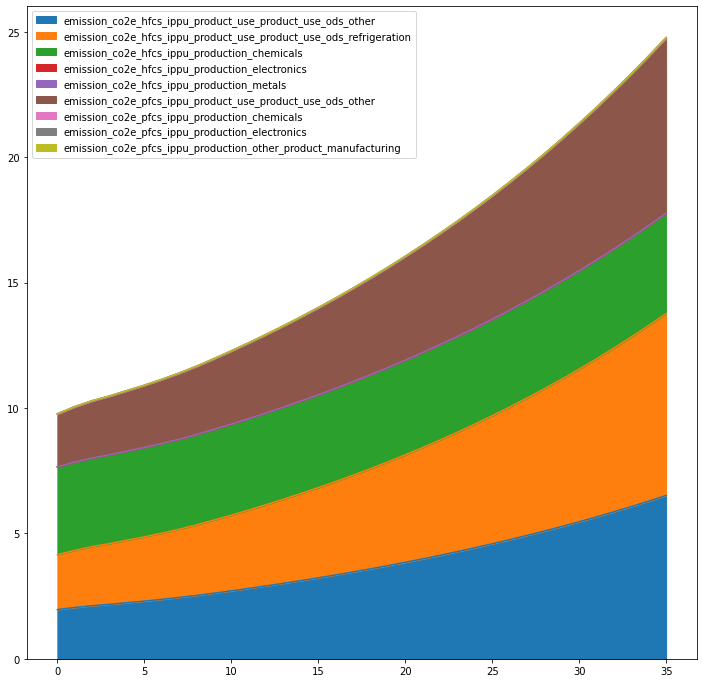

In [15]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlabel(sisepuede.key_time_period)
ax.set_ylabel("Emission MT CO2e")

primary_id = primary_keys_out[2]
df_cur = df_out[df_out[sisepuede.key_primary].isin([primary_id])]
df_cur[[x for x in df_cur.columns if x.startswith("emission_co2e_") and ("_ippu_" in x) and ("hfcs" in x) or ("pfcs" in x)]].plot.area(ax = ax)
plt.show()


###  4. The land use reallocation factor affects land use, imports, and exports

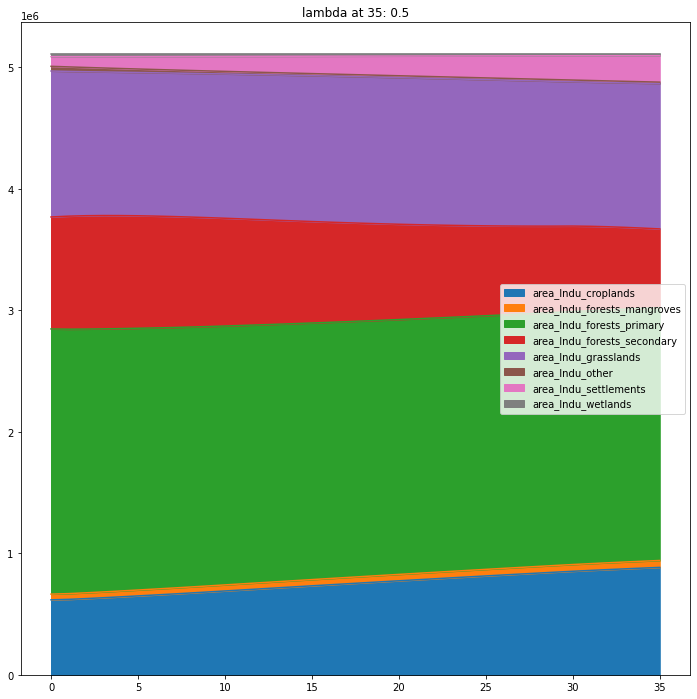

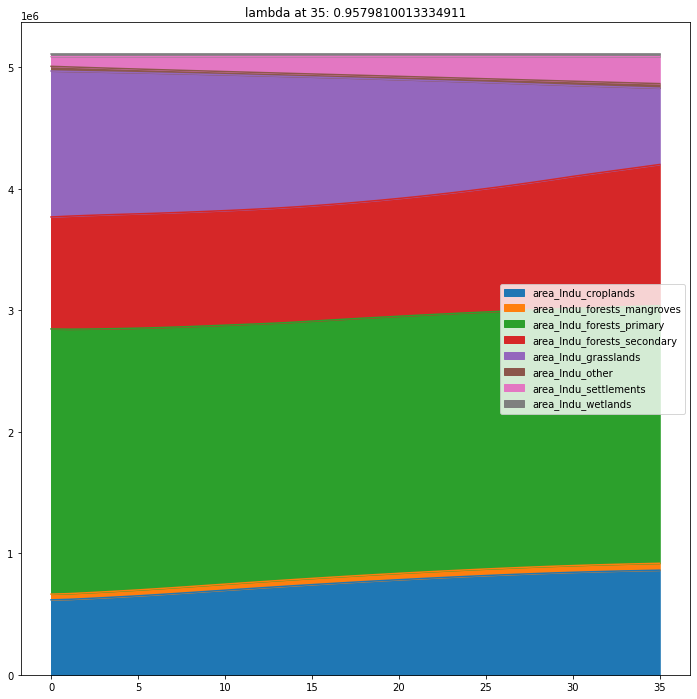

In [18]:
for ind in [0, 4]:
    i = primary_keys_out[ind]
    fig, ax = plt.subplots(figsize = (12, 12))
    
    df_cur = df_out[df_out["primary_id"] == i]
    df_cur = sisepuede.model_attributes.extract_model_variable(df_cur, "Land Use Area", return_type = "data_frame")
    
    val = sisepuede.generate_scenario_database_from_primary_key(i)["DEMO"]["lndu_reallocation_factor"].iloc[-1]
    
    df_cur.plot.area(ax = ax)
    ax.set_title(f"lambda at 35: {val}")
    
    plt.show()
    
    

###  5. Database functionality streamlines parallelization and analysis

# Want to explore models without using the whole system? Instantiate a `SISEPUEDEModels` object

In [ ]:
import SISEPUEDEModels as sm
import setup_analysis as sa

# ModelAttributes object is the basis for analysis--can be accessed through SISEPUEDE.model_attributes, 
# but it can be faster to instantiate the model directly. See `setup_analysis.py` for basic implementation
models = sm.SISEPUEDEModels(
    sa.model_attributes,
    allow_electricity_run = False, # include as `False` disallow Julia implementation. Convenient if working with any other subsectors
    # NOTE: if allowing electricity run, must include paths to NemoMod files. SISEPUEDE generally handles this
)